<a href="https://colab.research.google.com/github/Amulya-Anurag/Functions-for-removing-outliers-handling-datetime-entries-and-limiting-Pearson-Correlation-in-any-D/blob/master/Amulya_Anurag_Internship_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#lLiberaries Used
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Task 1: Removing the outliers
---



For detecting and tackling outliers I am using a 
method called Inter Quartile Range, also refered
to as IQR. IQR is the difference between the fourth and three fourth percentiles of a dataset.

A non-outliers observation should fall in between 
(Q1 - IQR , Q3 + IQR) 
where Q1 and Q3 are first and third quartile of the data.



In [ ]:
def outlier_remover(df):
    for i in df.columns:
        try:    # Try  part will only work on numerical type data, categorical data will go into except part

            #Calculating 1st and 3rd quantile 
            (Q1,Q3)=df[i].quantile(q=(.25,.75))

            #Calculating IQR
            IQR=Q3-Q1

            #Calculating maximum and limit in following lines
            max_limit=Q3 + 1.5*IQR
            min_limit=Q1 - 1.5*IQR
          
          # Filtering the data set, Here, I am dropping the outliers with their crossponding values
            df=df[df[i]>=min_limit]
            df=df[df[i]<=max_limit]
           
        except: # This part is for categorical datatypes
          continue
    return df

Showcase of above function:
DataSet Used:  https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

In [ ]:
# Loading the Data
df_Showcase=pd.read_csv('/content/train_ctrUa4K.csv')
df_Showcase.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


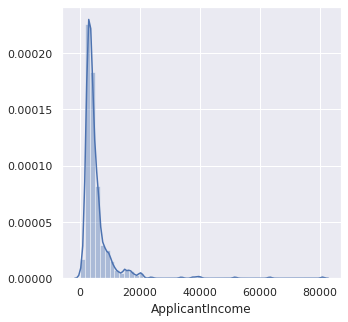

In [ ]:
# Check ApplicantIncome for Outliers
plt.figure(figsize=(5,5))
sns.distplot(df_Showcase.ApplicantIncome)
plt.show()

# The plot cleary indicates the presence of Outliers

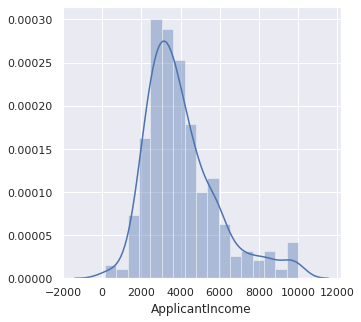

In [ ]:
# Applying the defined Function and checking for outliers
df_Outlier_Removed= outlier_remover(df_Showcase)
plt.figure(figsize=(5,5))
sns.distplot(df_Outlier_Removed.ApplicantIncome)
plt.show()

# the following plot verifies that the outliers have been removed

## N.B- Handling outliers due to natural causes requires manual analysis of dataset or a Fixed schema of data set. Since, this is general a function ,so I am treating all outliers as incorrect entries

#Task 2: Handling Date columns and creating a new columns with a difference between these columns
---



In [ ]:
def dateColumns(df):
    from itertools import combinations  # Will need this function later on
    
    # sometimes datetime columns are recogniosed as object or str, following lines will convert them back to datetime data type
    df_copy= df.apply(lambda col: pd.to_datetime(col, errors='coerce') if col.dtypes == object else col,axis=0)
    df_copy=df_copy.dropna(axis=1, how='all' )
    # The above lines will take care of Different formats of date .
     
     #updating the  original dataframe
    df[df_copy.columns]=df_copy
  
    
    #identifying date columns and storing them in a list 'date_columns'
    date_columns=[]
    for i in df.columns:
        if df[i].dtypes== '<M8[ns]':
            date_columns.append(i)
            df=df.dropna(axis=0,how='any',subset=[i])  #  delecting any invalid or null entry in date columns
 
    # Resetting the Index
    df=df.reset_index(drop=True)
    
   # Checking that making a difference column is possible or not, if possible it will point out which columns will participate in difference
    if len(date_columns)>1:
 
      # make a list that which columns name are adate columns and will create new columns
        date_pair=list(combinations(date_columns,2))
 
    else:
        return print('Adding new difference columns is not possible as less than two date columns are present')
 
 # adding new columns as required in question 
 
    for i in range(len(date_pair)):
        df['{0}-{1}'.format(date_pair[i][0], date_pair[i][1])]= df[date_pair[i][0]]- df[date_pair[i][1]]
        
    return df

Showcase of above function:
DataSet Used:

1.   A Dummy Dataset
2.   https://www.kaggle.com/lewisgmorris/warehouse-picking-times?select=pick+data.csv



In [ ]:
# Lets Create A Dummy Variables with 4 date columns with different date format, invalid date entries.
df_Showcase = pd.DataFrame(
     {'col1': ['A', 'B', 'C', 'D', 'E'],
      'col2': ['2016-02-04',
               '2017/02/04',
               '02-03-2016',
               '2017-0204',
               '2017-02 03'],
      'col3':['2019-02-14',
               '2018/02/04',
               '02-03-2016',
               '2013-02-04',
               '2017-02-13'],
      'col4':['1980-02-04',
               '1988/02/04',
               '02-03-1947',
               '1950-02-04',
               '2000-02-03'], 
       'col6':['1880-02-04',
               '1888/02/04',
               '02-03-1847',
               '1850-02-04',
               '1900-02-03'],
      'col7': [0, 1, 2, 3, 4],
        'col8': ['2','3','4','5','7'] })
print(df_Showcase.info())
df_Showcase.head() # check the dates( different formate and invalid dates) and their dtype( which is object type).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    5 non-null      object
 1   col2    5 non-null      object
 2   col3    5 non-null      object
 3   col4    5 non-null      object
 4   col6    5 non-null      object
 5   col7    5 non-null      int64 
 6   col8    5 non-null      object
dtypes: int64(1), object(6)
memory usage: 408.0+ bytes
None


,col1,col2,col3,col4,col6,col7,col8
0,A,2016-02-04,2019-02-14,1980-02-04,1880-02-04,0,2
1,B,2017/02/04,2018/02/04,1988/02/04,1888/02/04,1,3
2,C,02-03-2016,02-03-2016,02-03-1947,02-03-1847,2,4
3,D,2017-0204,2013-02-04,1950-02-04,1850-02-04,3,5
4,E,2017-02 03,2017-02-13,2000-02-03,1900-02-03,4,7


In [ ]:
# Applying the Function
df_Required=dateColumns(df_Showcase)
print(df_Required.dtypes)
df_Required.head(2)

col1                  object
col2          datetime64[ns]
col3          datetime64[ns]
col4          datetime64[ns]
col6          datetime64[ns]
col7                   int64
col8                  object
col2-col3    timedelta64[ns]
col2-col4    timedelta64[ns]
col2-col6    timedelta64[ns]
col3-col4    timedelta64[ns]
col3-col6    timedelta64[ns]
col4-col6    timedelta64[ns]
dtype: object


,col1,col2,col3,col4,col6,col7,col8,col2-col3,col2-col4,col2-col6,col3-col4,col3-col6,col4-col6
0,A,2016-02-04,2019-02-14,1980-02-04,1880-02-04,0,2,-1106 days,13149 days,49673 days,14255 days,50779 days,36524 days
1,B,2017-02-04,2018-02-04,1988-02-04,1888-02-04,1,3,-365 days,10593 days,47117 days,10958 days,47482 days,36524 days


In [ ]:
# Another showcase of above function with a real datset... (link has been provided)
df_Showcase=pd.read_csv('/content/pick data.csv')
print(df_Showcase.dtypes)
df_Showcase.head(2)
# There are two datecolumns viz. PH_PICKSTA and PH_PICKEND but still  are being recognised as object.

Id             int64
PH_DOC        object
PH_SORDER     object
PH_DELIVER    object
PH_PICKEDB    object
PH_PICKSTA    object
PH_PICKEND    object
PH_TOTALLI     int64
PH_TOTALBO     int64
dtype: object


,Id,PH_DOC,PH_SORDER,PH_DELIVER,PH_PICKEDB,PH_PICKSTA,PH_PICKEND,PH_TOTALLI,PH_TOTALBO
0,0,DOC299034,ORD26934,NaN,PAUL,23-02-15 12:25,23-02-15 12:25,2,1
1,1,DOC298740,ORD26652,NaN,PAUL,23-02-15 13:48,23-02-15 13:48,1,1


In [ ]:
#Lers apply the functions
df_Required=dateColumns(df_Showcase)
print(df_Required.dtypes)
df_Required.tail(2)

Id                                 int64
PH_DOC                            object
PH_SORDER                         object
PH_DELIVER                        object
PH_PICKEDB                        object
PH_PICKSTA                datetime64[ns]
PH_PICKEND                datetime64[ns]
PH_TOTALLI                         int64
PH_TOTALBO                         int64
PH_PICKSTA-PH_PICKEND    timedelta64[ns]
dtype: object


,Id,PH_DOC,PH_SORDER,PH_DELIVER,PH_PICKEDB,PH_PICKSTA,PH_PICKEND,PH_TOTALLI,PH_TOTALBO,PH_PICKSTA-PH_PICKEND
159963,159978,DOC366537,ORD87299,DEL38413,IT,2020-07-02 15:27:00,2020-07-02 15:31:00,15,1,-1 days +23:56:00
159964,159979,DOC366532,ORD87294,DEL38414,IT,2020-07-02 15:36:00,2020-07-02 15:37:00,6,1,-1 days +23:59:00


# Task 3: Dropping Columns with Pearson Correlation greater than 0.85
---



In [ ]:
def CorrCorrector(df,thresold): #df is data frame , thresold is the required limiting value of correlaton coff.
    from collections import Counter # Will need this module later
    df_final=df                                 # If pearson corr. is already less than 0.85 then no need to do anything
 
    # Callculating correlation among different numerical columns of dataset and storing them into new dataframe and taking their absolute value
    df1=df.corr(method='pearson').abs()
 
    # Selecting only those values which are larger than required thresold value (here 0.85)
    df1=df1[df1>thresold]
 
    # Removing Autocorrelation( i.e correlation with self) for each columns as it will always be 1, here making it 0
    for i in df.columns:
        for j in df.columns:
            df1.loc[i,j]= 0 if i==j else df1.loc[i,j]
 
    # Checking if max correlation from corr. dataframe. if it is greater than thresold then column dropping will be done
    if df1.max().max()>thresold:
       
       #Sele\cting the pair of columns and removing Nan values
        df2= pd.DataFrame(df1.stack())
        list_of_features=[df2.index[i][0] for i in range(df2.shape[0])]
 
        # Selecting that column which is causing correlation higher than other
        most_corr_feature= Counter(list_of_features) # creating a counter here
        drop_feature= most_corr_feature.most_common()[0][0]
 
        # Dropping the most corrleated column(feature)
        df=df.drop([drop_feature],axis=1)
 
        #Features which are being dropped
        print('Features Drop:     ' + drop_feature)
 
        # Using Recursion in order to remove all the required feature to maintain the level of Correaltion
        df_final=CorrCorrector(df,thresold)
 
    return df_final

Showcase of the above function: DataSet Used: https://www.kaggle.com/vikrishnan/boston-house-prices

In [ ]:
#Lets Load the Data set
df_Showcase=pd.read_csv('/content/HousingData.csv')
df_Showcase.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


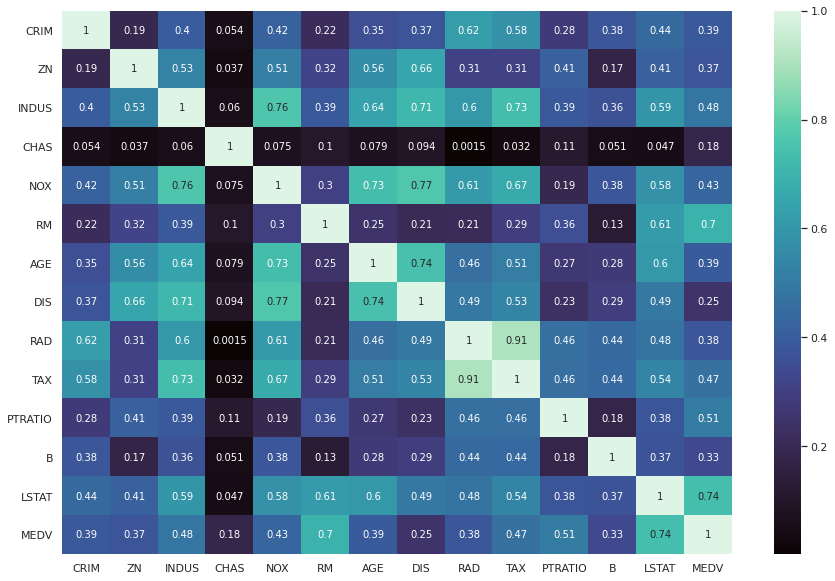

In [ ]:
# Lets Calculate the correlation cofficient of the dataframe

plt.figure(figsize=(15,10))
sns.heatmap(df_Showcase.corr().abs(),cmap='mako',annot=True)
plt.show()
#There are some pair having correlation grater than 0.85

Features Drop:     RAD


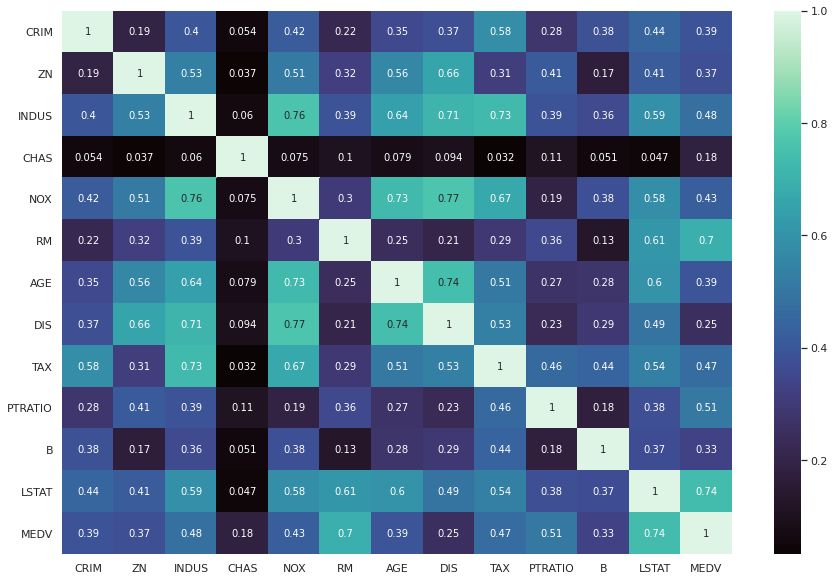

In [ ]:
# lets apply the above function and check the result 
df_Required=CorrCorrector(df_Showcase , 0.85)
plt.figure(figsize=(15,10))
sns.heatmap(df_Required.corr().abs(),cmap='mako',annot=True)
plt.show()

#Results Shows There are no correlated feature (with r>0.85)

Features Drop:     INDUS
Features Drop:     NOX
Features Drop:     TAX
Features Drop:     AGE
Features Drop:     MEDV
Features Drop:     CRIM
Features Drop:     ZN
Features Drop:     RM


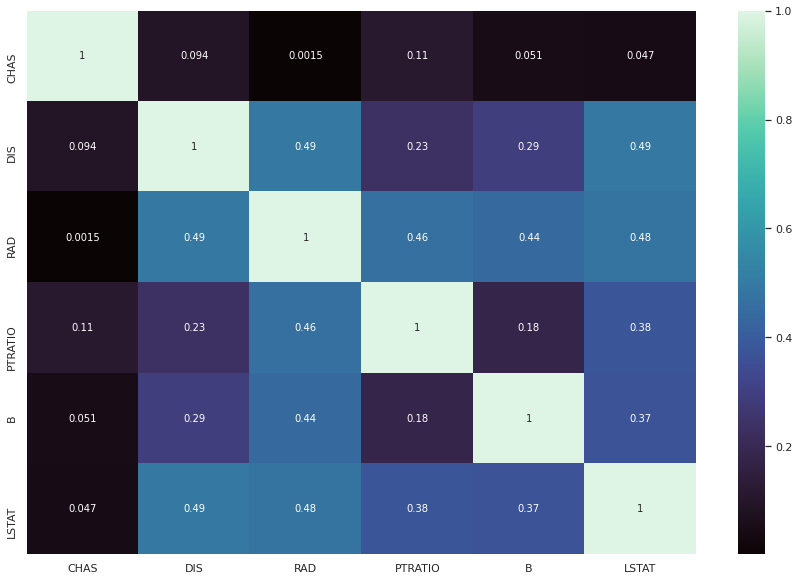

In [ ]:
### For sake of visualization lets assume the thresold = 0.5 and apply the function


df_Required= CorrCorrector(df_Showcase , 0.5)
plt.figure(figsize=(15,10))
sns.heatmap(df_Required.corr().abs(),cmap='mako',annot=True)
plt.show()
# Results Indicate the features drops in order to reduce the corrleation under 0.5 